In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
# Importing the data
circuits = pd.read_csv('data/Formula1/circuits.csv')
constructor_results = pd.read_csv('data/Formula1/constructor_results.csv')
constructor_standings = pd.read_csv('data/Formula1/constructor_standings.csv')
constructors = pd.read_csv('data/Formula1/constructors.csv')
driver_standings = pd.read_csv('data/Formula1/driver_standings.csv')
drivers = pd.read_csv('data/Formula1/drivers.csv')
lap_times = pd.read_csv('data/Formula1/lap_times.csv')
pit_stops = pd.read_csv('data/Formula1/pit_stops.csv')
qualifying = pd.read_csv('data/Formula1/qualifying.csv')
races = pd.read_csv('data/Formula1/races.csv')
results = pd.read_csv('data/Formula1/results.csv')
seasons = pd.read_csv('data/Formula1/seasons.csv')
sprint_results = pd.read_csv('data/Formula1/sprint_results.csv')
status = pd.read_csv('data/Formula1/status.csv')

In [213]:
constructors_data = pd.merge(constructors, constructor_standings, on='constructorId')
team_data_by_race = pd.merge(constructors_data, races, on='raceId').sort_values(by='date')
team_data_by_race = pd.merge(team_data_by_race, results, how = 'left', left_on=['raceId', 'constructorId'], right_on=['raceId', 'constructorId'])
team_data_by_race = pd.merge(team_data_by_race, drivers, on='driverId')

team_data_by_race['driver'] = team_data_by_race[['forename', 'surname']].agg(' '.join, axis=1)
team_data_by_race = team_data_by_race[['name_x','points_x','position_x','name_y','wins','date','year', 'driverId', 'driver']]
team_data_by_race['driverId'] = team_data_by_race['driverId'].astype('int')
team_data_by_race.rename(columns={'name_x':'team', 'name_y':'circuit', 'points_x':'points','position_x':'rank'}, inplace=True)
team_data_by_race['date']= pd.to_datetime(team_data_by_race['date'])
team_data_by_race = team_data_by_race[(~(team_data_by_race['date'] >= '2023-03-05') & ~(team_data_by_race['date'] <= '2000-01-01'))]


# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     team_data_by_race.columns

team_data_by_race.columns
# #plot positions of teams across  different races with rotates date labels
# sns.scatterplot(data=team_data_by_race, x='date', y='points', hue='team', size= 'wins', alpha=0.5)

Index(['team', 'points', 'rank', 'circuit', 'wins', 'date', 'year', 'driverId',
       'driver'],
      dtype='object')

In [214]:
#Group by date and select rows with max dates
final_results = team_data_by_race.groupby("year").apply(lambda x: x[x['date'] == x['date'].max()])
final_results.drop(columns=['year', 'date', 'circuit'], inplace=True)
driver_tuples = final_results.groupby(['year', 'team']).agg({'driverId': lambda x: tuple(x), 'driver': lambda x: tuple(x)})
final_results = pd.merge(driver_tuples,final_results, on=['year', 'team'])
#sort each index by points
final_results.sort_values(by=['year','points'], ascending=False, inplace=True)
final_results.drop(['driverId_y', 'driver_y'], axis=1, inplace=True)
final_results.rename(columns={'driverId_x':'driverIds', 'driver_x':'drivers'}, inplace=True)
final_results.drop_duplicates(inplace=True)
final_results.reset_index(inplace=True)
final_results['rank'].info

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(final_results)

<bound method Series.info of 0       1
1       2
2       3
3       4
4       5
       ..
236     7
237     8
238     9
239    10
240    11
Name: rank, Length: 241, dtype: int64>

In [215]:
season_results = team_data_by_race.copy()
#sort each index by points
season_results.sort_values(by=['date','points'], ascending=False, inplace=True)
season_results.drop(['driverId', 'driver'], axis=1, inplace=True)
season_results.drop_duplicates(inplace=True)
season_results.reset_index(inplace=True)

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(season_results)

In [216]:
def get_team_data(df):
    red_bull = df[df['team'].isin(['Red Bull', 'Jaguar'])]
    ferrari = df[df['team'] == 'Ferrari']
    mercedes = df[df['team'].isin(['Mercedes', 'Honda', 'Brawn', 'BAR'])]
    alpine = df[df['team'].isin(['Alpine F1 Team', 'Renault', 'Lotus F1', 'Benetton'])]
    mclaren = df[df['team'] == 'McLaren']
    aston_martin = df[df['team'].isin(['Aston Martin', 'Racing Point', 'Force India', 'Spyker', 'MF1', 'Spyker MF1'])]
    alfa_romeo = df[df['team'].isin(['Alfa Romeo', 'Sauber','BMW Sauber'])]
    haas = df[df['team'] == 'Haas F1 Team']
    alpha_tauri = df[df['team'].isin(['AlphaTauri', 'Toro Rosso', 'Minardi'])]
    williams = df[df['team'] == 'Williams']
    caterham = df[df['team'].isin(['Caterham','Lotus'])]
    arrows = df[df['team'] == 'Arrows']
    hrt = df[df['team'] == 'HRT']
    jordan = df[df['team'] == 'Jordan']
    marussia = df[df['team'].isin(['Marussia', 'Manor Marussia', 'Virgin'])]
    prost = df[df['team'] == 'Prost']
    super_aguri = df[df['team'] == 'Super Aguri']
    toyota = df[df['team'] == 'Toyota']
    return red_bull, ferrari, mercedes, alpine, mclaren, aston_martin, alfa_romeo, haas, alpha_tauri, williams, caterham, arrows, hrt, jordan, marussia, prost, super_aguri, toyota

In [217]:
red_bull = get_team_data(final_results)[0]
ferrari = get_team_data(final_results)[1]
mercedes = get_team_data(final_results)[2]
alpine = get_team_data(final_results)[3]
mclaren = get_team_data(final_results)[4]
aston_martin = get_team_data(final_results)[5]
alfa_romeo = get_team_data(final_results)[6]
haas = get_team_data(final_results)[7]
alpha_tauri = get_team_data(final_results)[8]
williams = get_team_data(final_results)[9]
caterham = get_team_data(final_results)[10]
arrows = get_team_data(final_results)[11]
hrt = get_team_data(final_results)[12]
jordan = get_team_data(final_results)[13]
marussia = get_team_data(final_results)[14]
prost = get_team_data(final_results)[15]
super_aguri = get_team_data(final_results)[16]
toyota = get_team_data(final_results)[17]

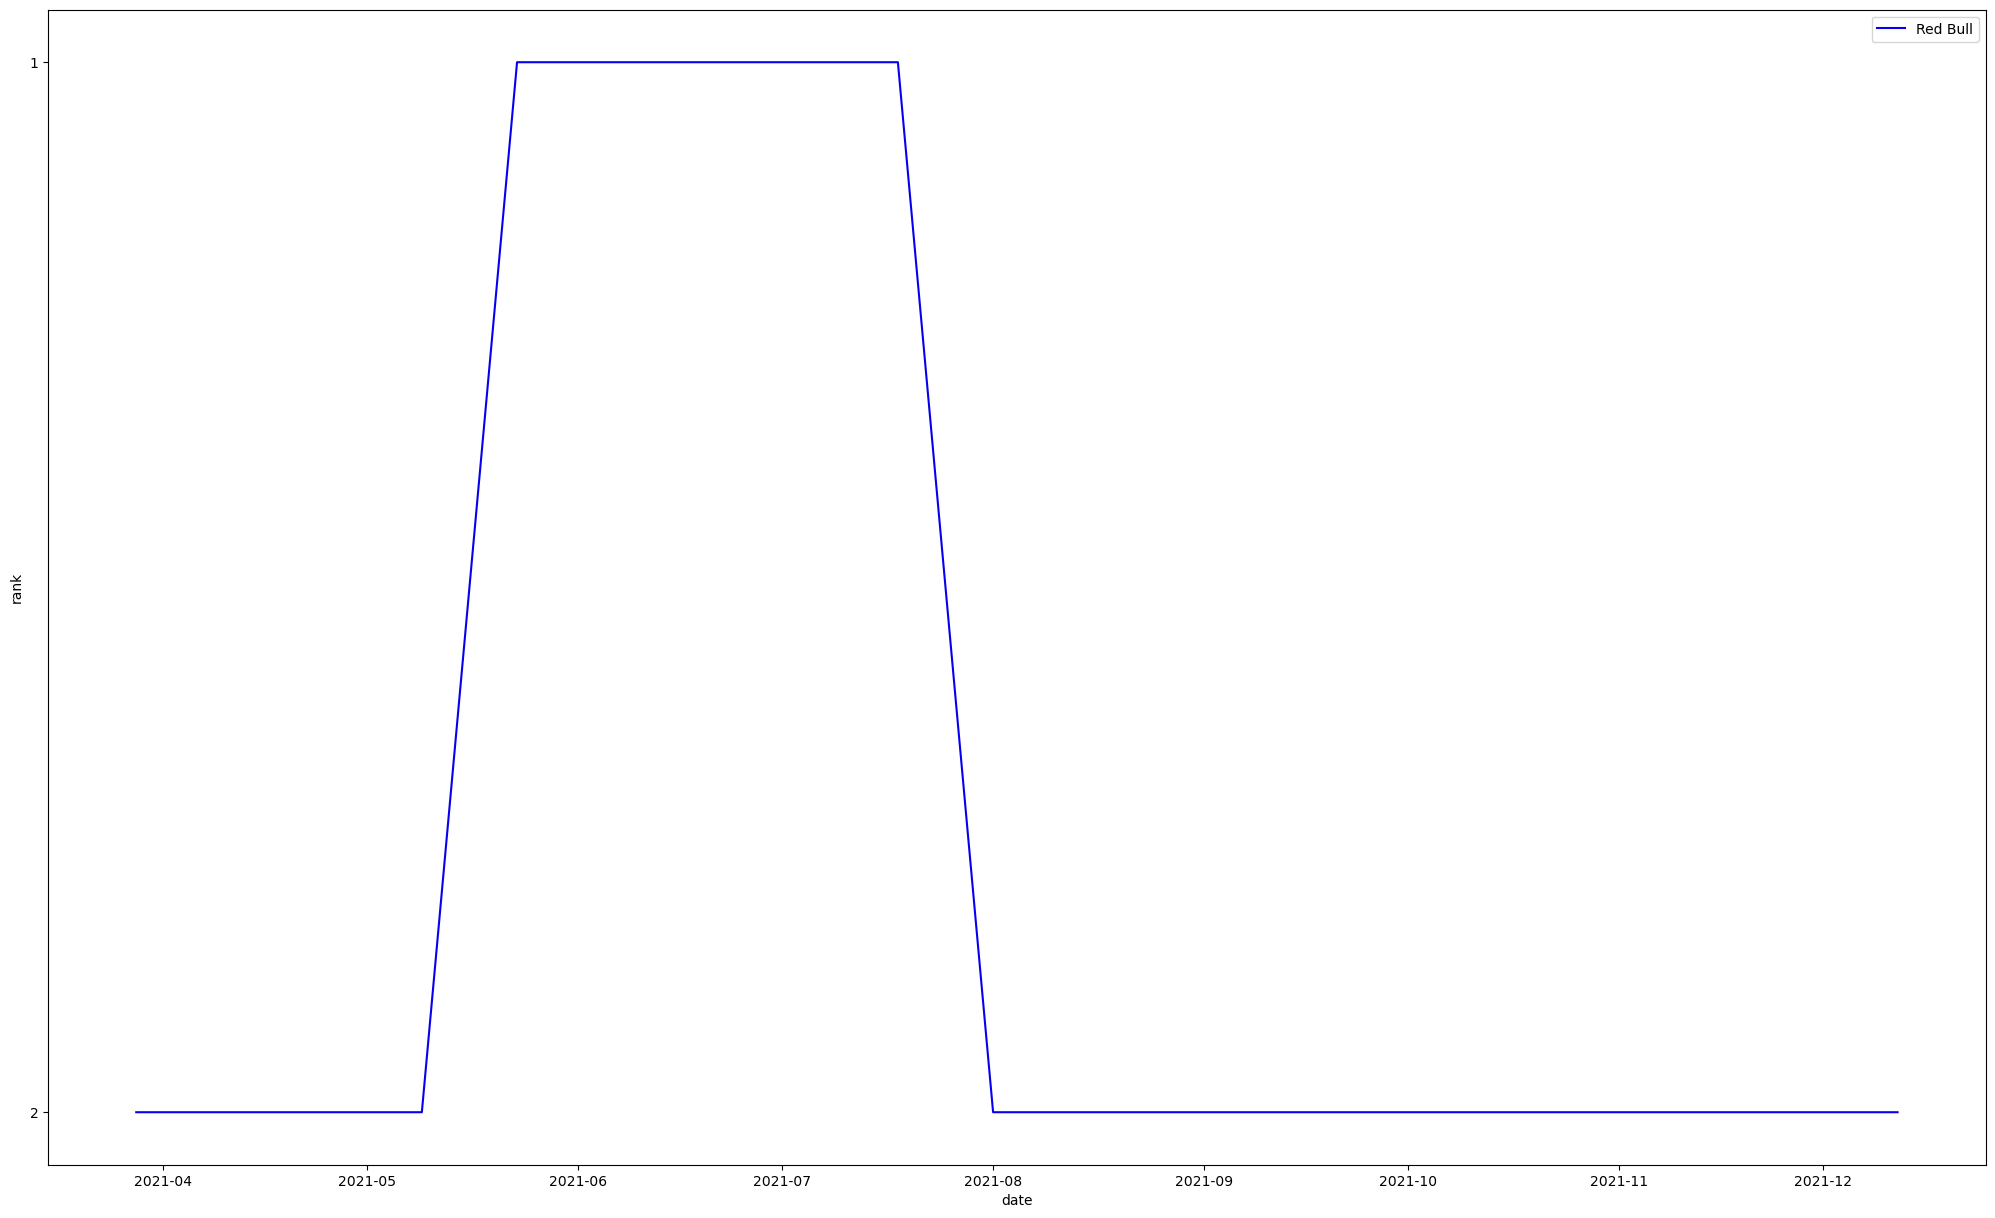

In [218]:
red_bull_season = get_team_data(season_results)[0]

#display data grouped by year as index
red_bull_season_2022 = red_bull_season[red_bull_season['year'] == 2021]
lowest_rank = red_bull_season_2022['rank'].max()

plt.figure(figsize=(25,15))
ax = sns.lineplot()
sns.lineplot(data=red_bull_season_2022, x='date', y='rank', label='Red Bull', color='#0600EF', ax=ax)
ax.set_yticks(range(1,lowest_rank+1))
ax.invert_yaxis()


Text(0.5, 1.0, 'F1 Teams Performance Over Time')

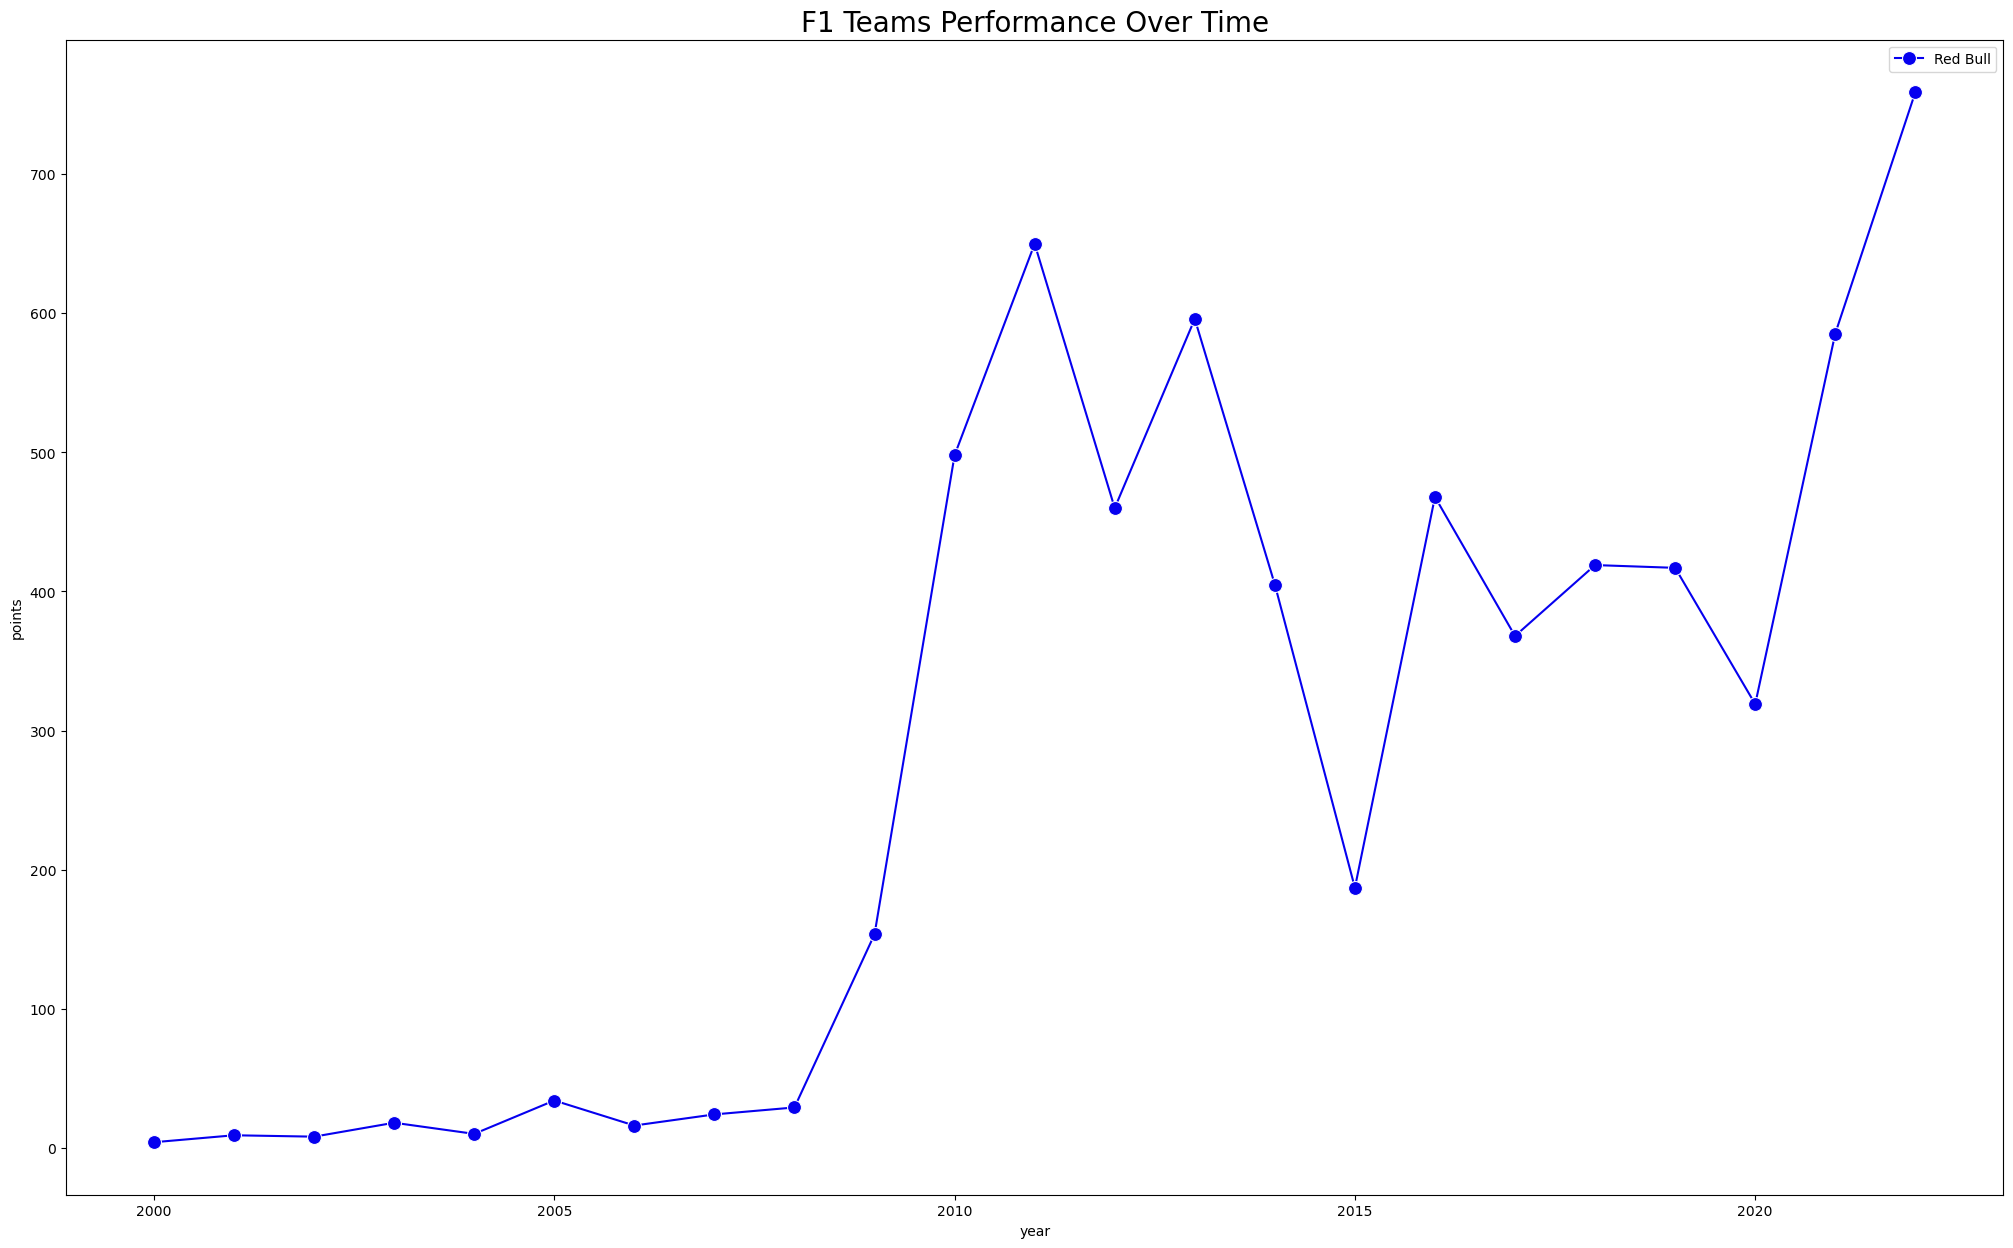

In [219]:
plt.figure(figsize=(25,15))
ax = sns.lineplot()
sns.lineplot(data=red_bull, x='year', y='points', label='Red Bull', color='#0600EF', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=ferrari, x='year', y='points', label='Ferrari', color="#ff1200", ax=ax, marker='o', markersize=10)
# sns.lineplot(data=mercedes, x='year', y='points', label='Mercedes', color='#00A19B', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=alpine, x='year', y='points', label='Alpine', color='#0090ff', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=mclaren, x='year', y='points', label='McLaren', color='#ff9800', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=aston_martin, x='year', y='points', label='Aston Martin', color='#006f62', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=alfa_romeo, x='year', y='points', label='Alfa Romeo', color='#9b0000', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=haas, x='year', y='points', label='Haas', color='#E6002B', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=alpha_tauri, x='year', y='points', label='Alpha Tauri', color='#2B4562', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=williams, x='year', y='points', label='Williams', color='#005AFF', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=caterham, x='year', y='points', label='Caterham', color='#009999', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=arrows, x='year', y='points', label='Arrows', color='#FF7300', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=hrt, x='year', y='points', label='HRT', color='#A6904F', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=jordan, x='year', y='points', label='Jordan', color='#ffff00', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=marussia, x='year', y='points', label='Marussia', color='#f54814', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=prost, x='year', y='points', label='Prost', color='#021dc9', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=super_aguri, x='year', y='points', label='Super Aguri', color='#C70025', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=toyota, x='year', y='points', label='Toyota', color='#ffcfea', ax=ax, marker='o', markersize=10)
ax.set_title('F1 Teams Performance Over Time', fontsize=20)

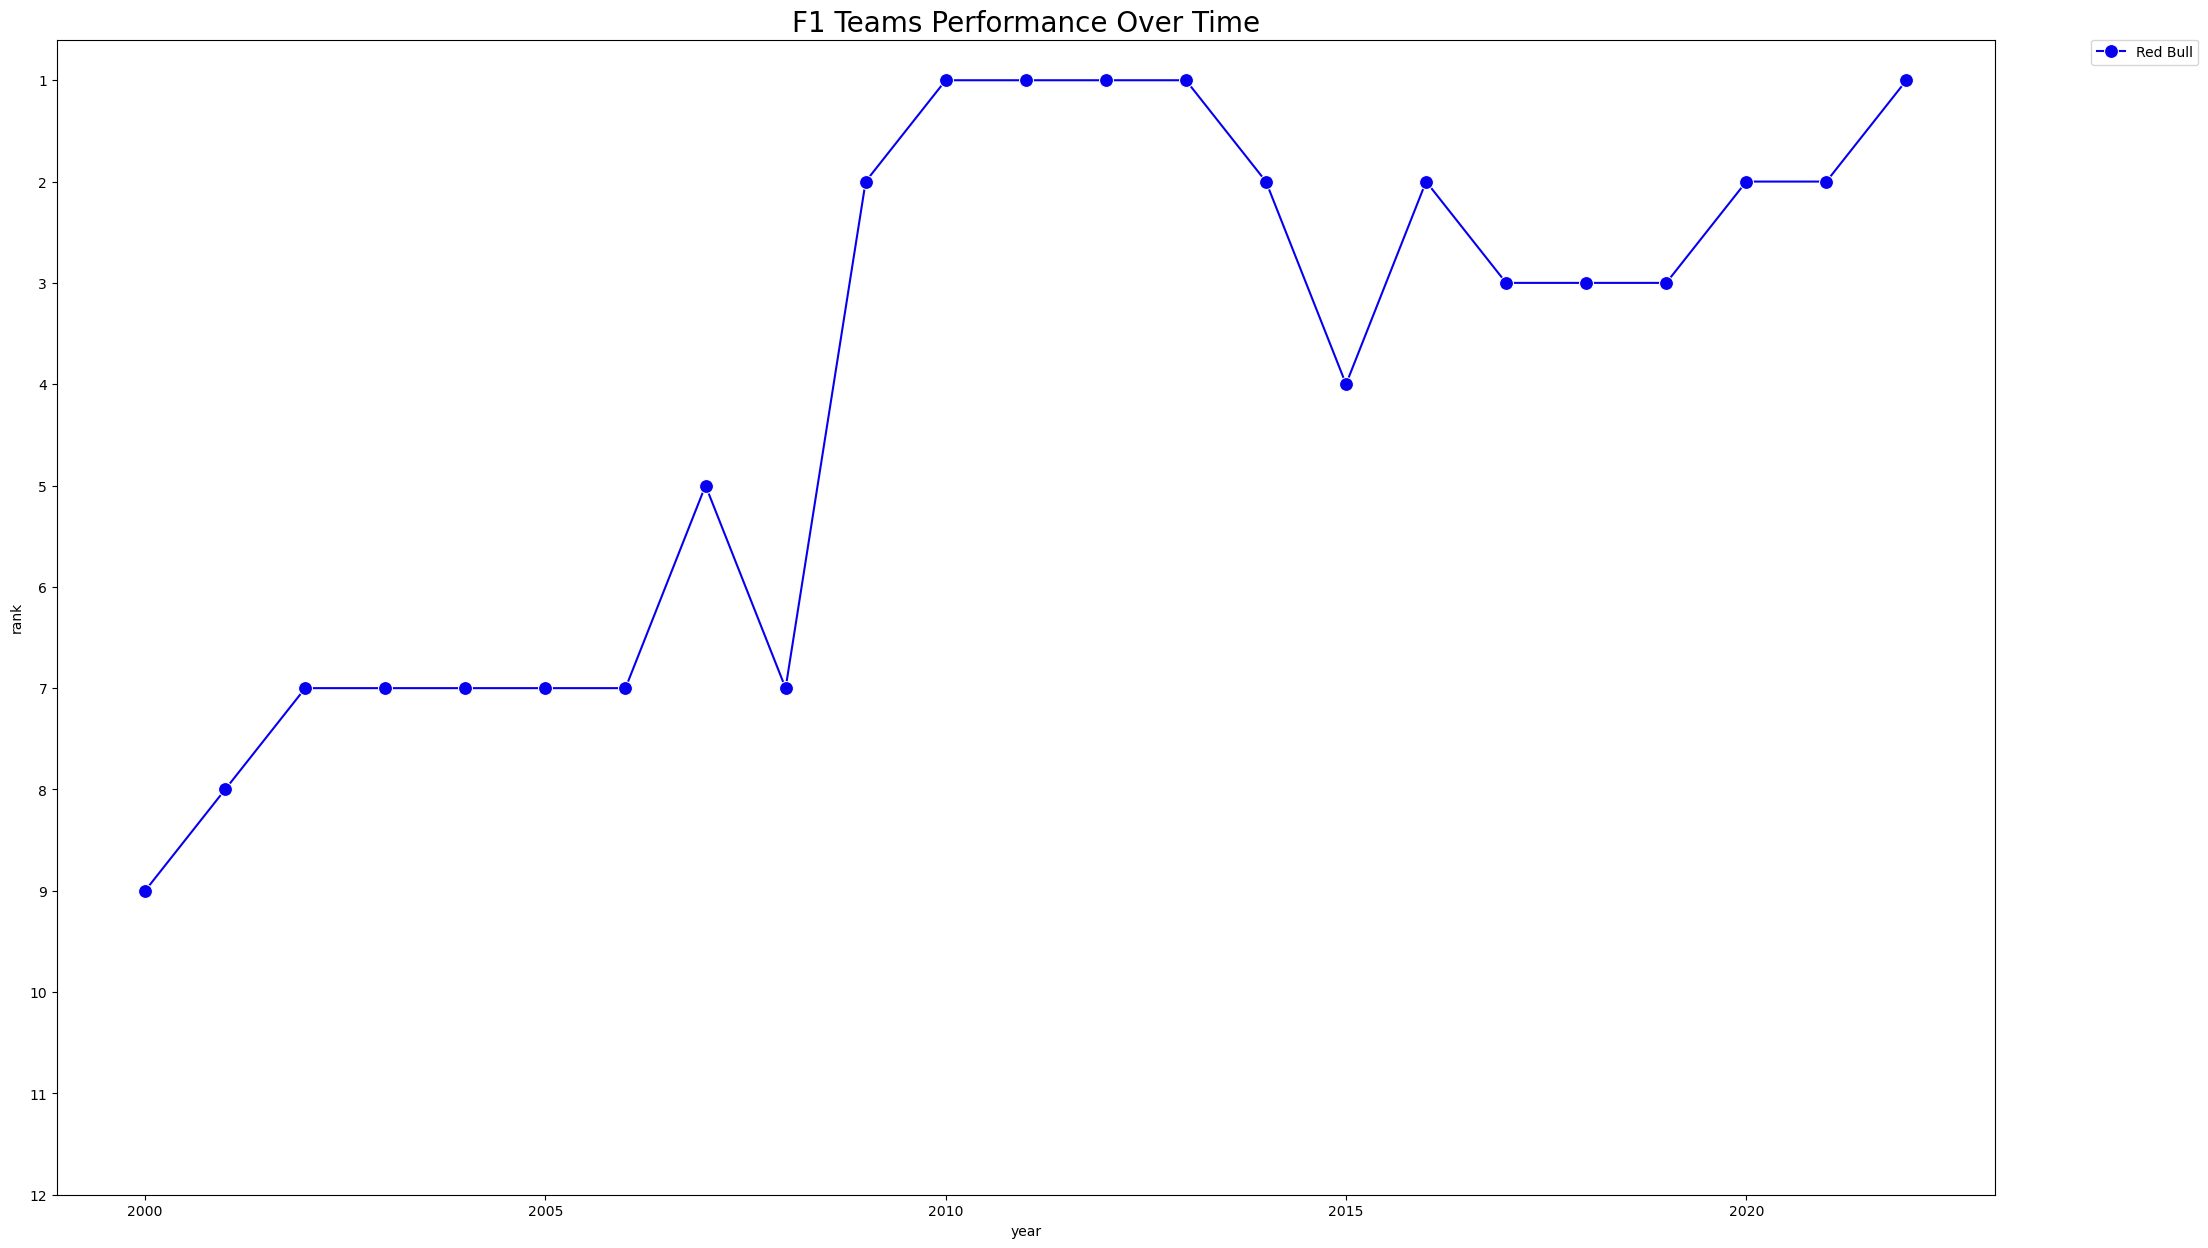

In [220]:
plt.figure(figsize=(25,15))
ax = sns.lineplot()
sns.lineplot(data=red_bull, x='year', y='rank', label='Red Bull', color='#0600EF', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=ferrari, x='year', y='rank', label='Ferrari', color="#ff1200", ax=ax, marker='o', markersize=10)
# sns.lineplot(data=mercedes, x='year', y='rank', label='Mercedes', color='#00A19B', ax=ax, marker='o', markersize=10) 
# sns.lineplot(data=alpine, x='year', y='rank', label='Alpine', color='#0090ff', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=mclaren, x='year', y='rank', label='McLaren', color='#ff9800', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=aston_martin, x='year', y='rank', label='Aston Martin', color='#006f62', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=alfa_romeo, x='year', y='rank', label='Alfa Romeo', color='#9b0000', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=haas, x='year', y='rank', label='Haas', color='#E6002B', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=alpha_tauri, x='year', y='rank', label='Alpha Tauri', color='#2B4562', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=williams, x='year', y='rank', label='Williams', color='#005AFF', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=caterham, x='year', y='rank', label='Caterham', color='#009999', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=arrows, x='year', y='rank', label='Arrows', color='#FF7300', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=hrt, x='year', y='rank', label='HRT', color='#A6904F', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=jordan, x='year', y='rank', label='Jordan', color='#ffff00', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=marussia, x='year', y='rank', label='Marussia', color='#f54814', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=prost, x='year', y='rank', label='Prost', color='#021dc9', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=super_aguri, x='year', y='rank', label='Super Aguri', color='#C70025', ax=ax, marker='o', markersize=10)
# sns.lineplot(data=toyota, x='year', y='rank', label='Toyota', color='#ffcfea', ax=ax, marker='o', markersize=10)
ax.set_title('F1 Teams Performance Over Time', fontsize=20)
ax.set_yticks(range(1,13))
ax.invert_yaxis()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [221]:
display(final_results[final_results['year'] == 2007])

,year,team,driverIds,drivers,points,rank,wins
157,2007,McLaren,"(4, 1)","(Fernando Alonso, Lewis Hamilton)",218.0,11,8
158,2007,Ferrari,"(8, 13)","(Kimi Räikkönen, Felipe Massa)",204.0,1,9
159,2007,BMW Sauber,"(2, 9)","(Nick Heidfeld, Robert Kubica)",101.0,2,0
160,2007,Renault,"(21, 5)","(Giancarlo Fisichella, Heikki Kovalainen)",51.0,3,0
161,2007,Williams,"(3, 6)","(Nico Rosberg, Kazuki Nakajima)",33.0,4,0
162,2007,Red Bull,"(14, 17)","(David Coulthard, Mark Webber)",24.0,5,0
163,2007,Toyota,"(15, 23)","(Jarno Trulli, Ralf Schumacher)",13.0,6,0
164,2007,Toro Rosso,"(24, 20)","(Vitantonio Liuzzi, Sebastian Vettel)",8.0,7,0
165,2007,Honda,"(22, 18)","(Rubens Barrichello, Jenson Button)",6.0,8,0
166,2007,Super Aguri,"(11, 19)","(Takuma Sato, Anthony Davidson)",4.0,9,0


In [252]:
race_results = pd.merge(races, results, on='raceId')
# display(race_results)
race_results = race_results[['raceId', 'year', 'name', 'milliseconds','statusId']]
race_results = pd.merge(race_results, status, on='statusId')

not_completed = race_results.copy()

<Figure size 2000x1000 with 0 Axes>

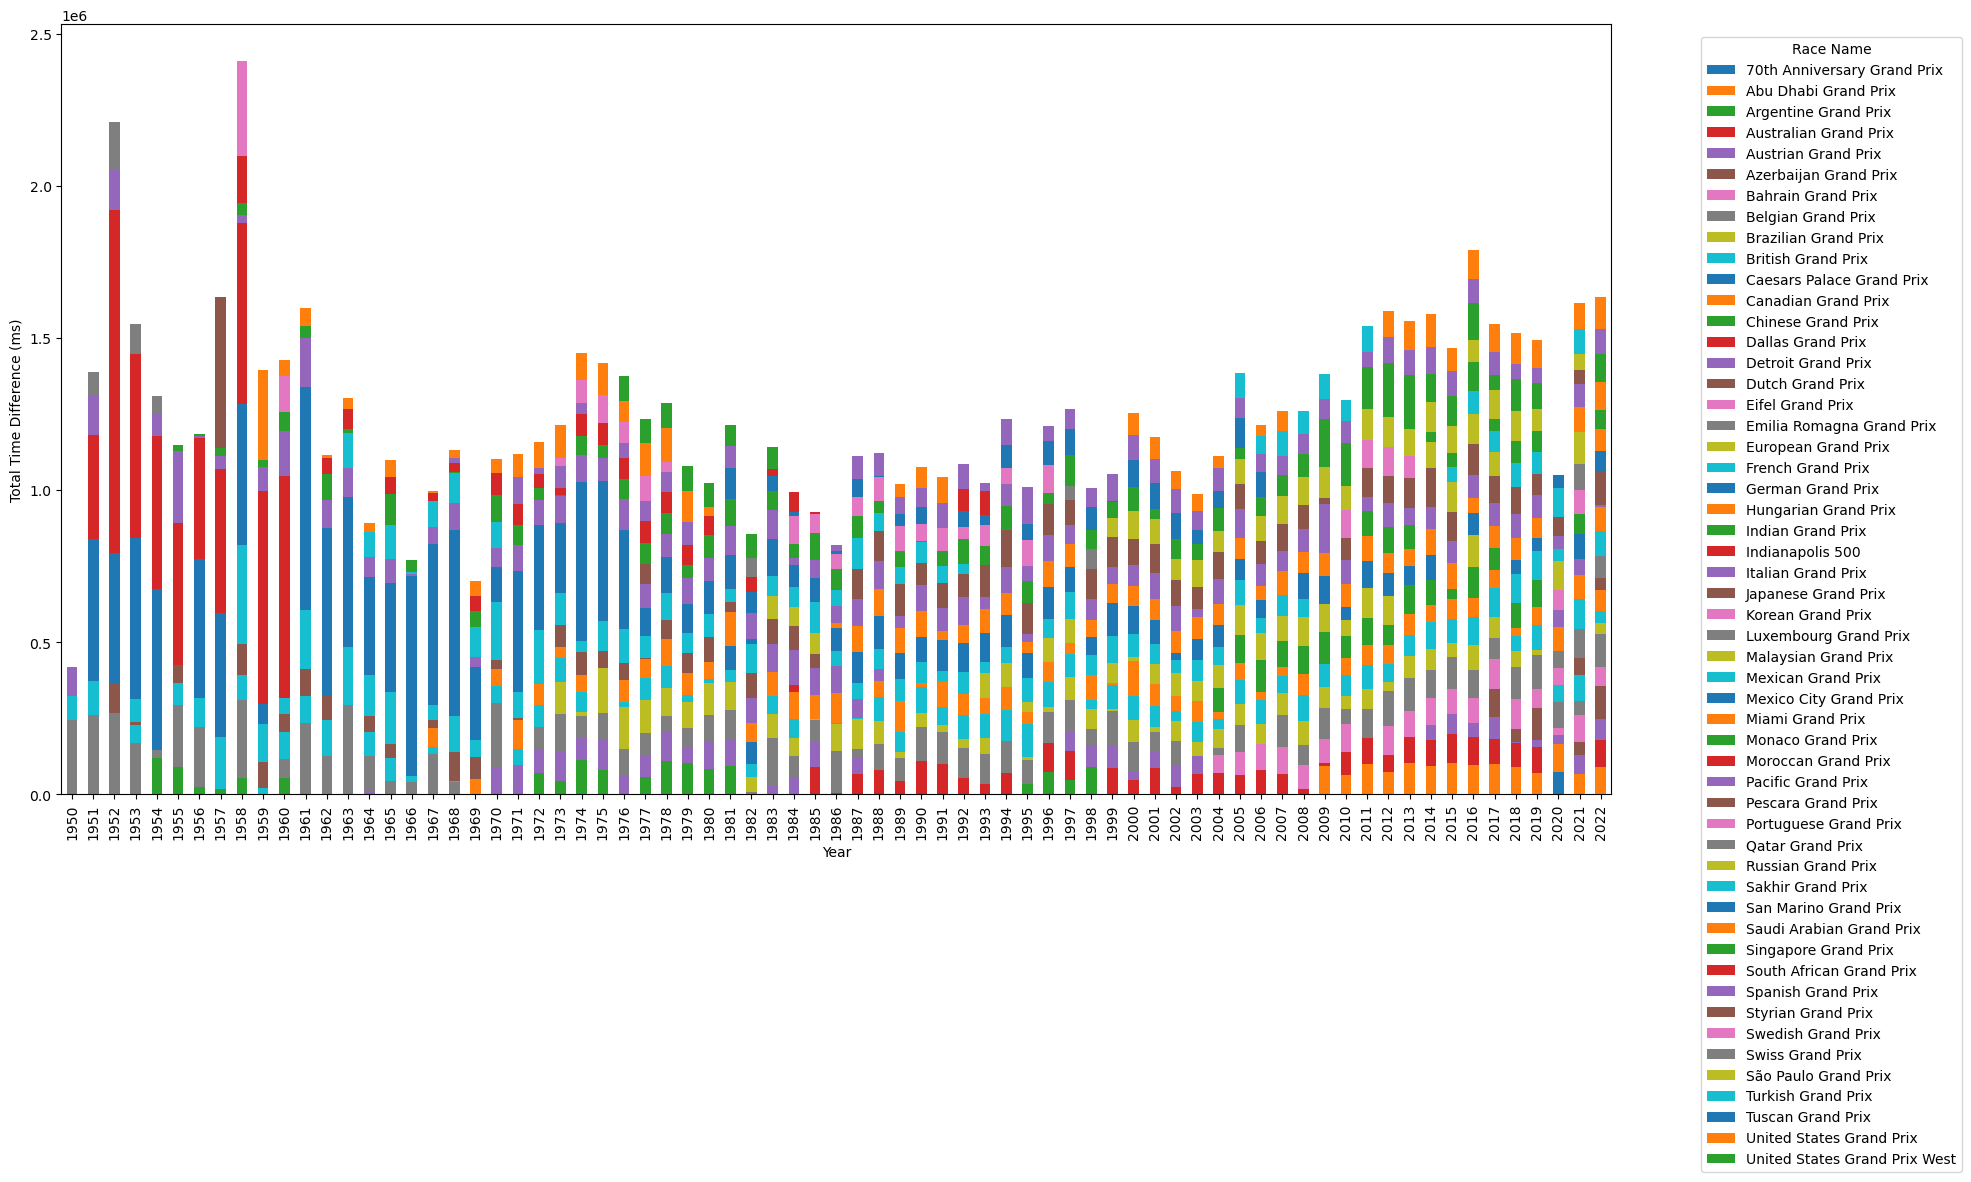

In [253]:
# Replace '\N' values with NaN and drop them
race_results.replace('\\N', np.nan, inplace=True)
race_results.dropna(inplace=True)

# Convert milliseconds string to milliseconds datetime
race_results['milliseconds'] = race_results['milliseconds'].astype('int64')

# Group by raceId, year, and name, and calculate the min and max milliseconds
race_results = race_results.groupby(['raceId', 'year', 'name']).agg({'milliseconds': ['min', 'max']})

# Calculate the delta (difference) between the fastest and slowest laps
race_results['delta'] = race_results["milliseconds"]["max"] - race_results["milliseconds"]["min"]
race_results.reset_index(inplace=True)

# Calculate the total time difference for each year
yearly_deltas = race_results.groupby(['year', 'name'])['delta'].sum().reset_index()

# Pivot the data to have years as the index, race names as columns, and the deltas as the values
pivoted_data = yearly_deltas.pivot(index='year', columns='name', values='delta')
pivoted_data.fillna(0, inplace=True)

# Create the stacked bar chart
plt.figure(figsize=(20, 10))
pivoted_data.plot.bar(stacked=True, figsize=(20, 10))

plt.xticks(range(len(pivoted_data.index)), pivoted_data.index, rotation=90)
plt.ylabel('Total Time Difference (ms)')
plt.xlabel('Year')
plt.legend(title='Race Name', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.9)
plt.show()


[Text(1950, 0, '1950'),
 Text(1951, 0, '1951'),
 Text(1952, 0, '1952'),
 Text(1953, 0, '1953'),
 Text(1954, 0, '1954'),
 Text(1955, 0, '1955'),
 Text(1956, 0, '1956'),
 Text(1957, 0, '1957'),
 Text(1958, 0, '1958'),
 Text(1959, 0, '1959'),
 Text(1960, 0, '1960'),
 Text(1961, 0, '1961'),
 Text(1962, 0, '1962'),
 Text(1963, 0, '1963'),
 Text(1964, 0, '1964'),
 Text(1965, 0, '1965'),
 Text(1966, 0, '1966'),
 Text(1967, 0, '1967'),
 Text(1968, 0, '1968'),
 Text(1969, 0, '1969'),
 Text(1970, 0, '1970'),
 Text(1971, 0, '1971'),
 Text(1972, 0, '1972'),
 Text(1973, 0, '1973'),
 Text(1974, 0, '1974'),
 Text(1975, 0, '1975'),
 Text(1976, 0, '1976'),
 Text(1977, 0, '1977'),
 Text(1978, 0, '1978'),
 Text(1979, 0, '1979'),
 Text(1980, 0, '1980'),
 Text(1981, 0, '1981'),
 Text(1982, 0, '1982'),
 Text(1983, 0, '1983'),
 Text(1984, 0, '1984'),
 Text(1985, 0, '1985'),
 Text(1986, 0, '1986'),
 Text(1987, 0, '1987'),
 Text(1988, 0, '1988'),
 Text(1989, 0, '1989'),
 Text(1990, 0, '1990'),
 Text(1991, 0, '

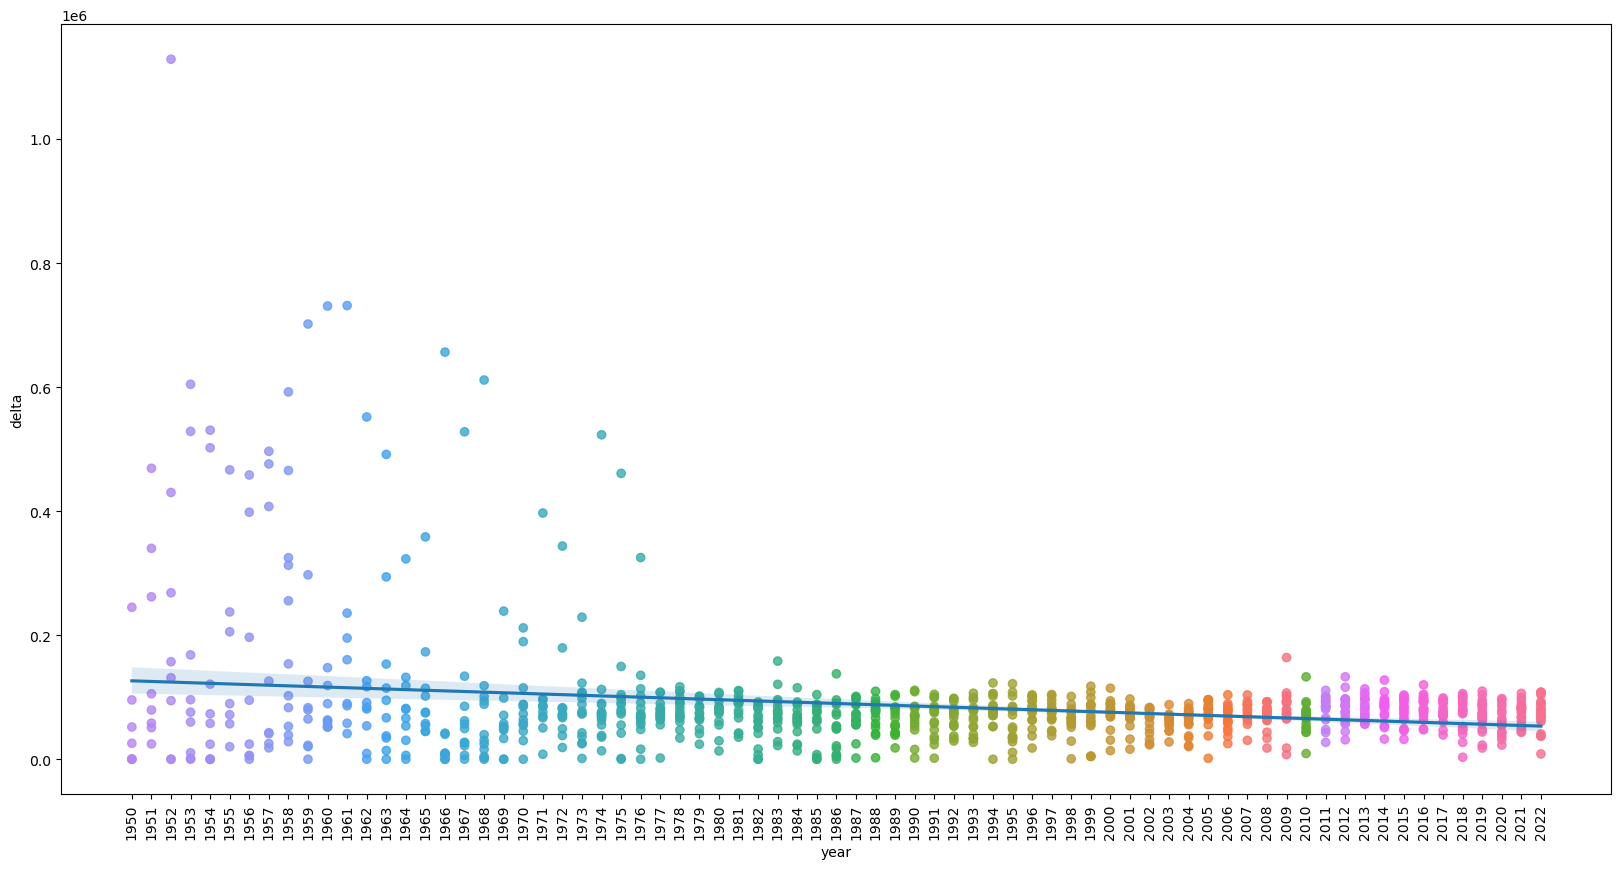

In [241]:
#drop \N values
race_results.replace('\\N', np.nan, inplace=True)
race_results.dropna(inplace=True)
#convert milliseconds string to milliseconds datetime
race_results['milliseconds'] = race_results['milliseconds'].astype('int64')

#get min an max race times per race per year
race_results = race_results.groupby(['raceId', 'year', 'name']).agg({'milliseconds': ['min', 'max']})
# #add new column with delta between fastest and slowest lap
race_results['delta'] = race_results["milliseconds"]["max"] - race_results["milliseconds"]["min"]
race_results.reset_index(inplace=True)
# aus_gp = race_results[race_results['name'] == 'Bahrain Grand Prix']
date_range = np.sort(race_results['year'].unique())

#assign each race a color
colour_map = sns.color_palette("husl", len(race_results['raceId'].unique()))


plt.figure(figsize=(20,10))
ax = sns.regplot(data=race_results, x='year', y='delta', scatter_kws={'color':colour_map})
ax.set_xticks(date_range)
ax.set_xticklabels(date_range, rotation=90)

/var/folders/xs/x2x4yg29089c8t_v4z9nymz40000gn/T/ipykernel_72453/3189963294.py:23: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  retired_drivers = pd.merge(retired_drivers, retire_reason, on=['raceId', 'year', 'name'])


<Figure size 2000x1000 with 0 Axes>

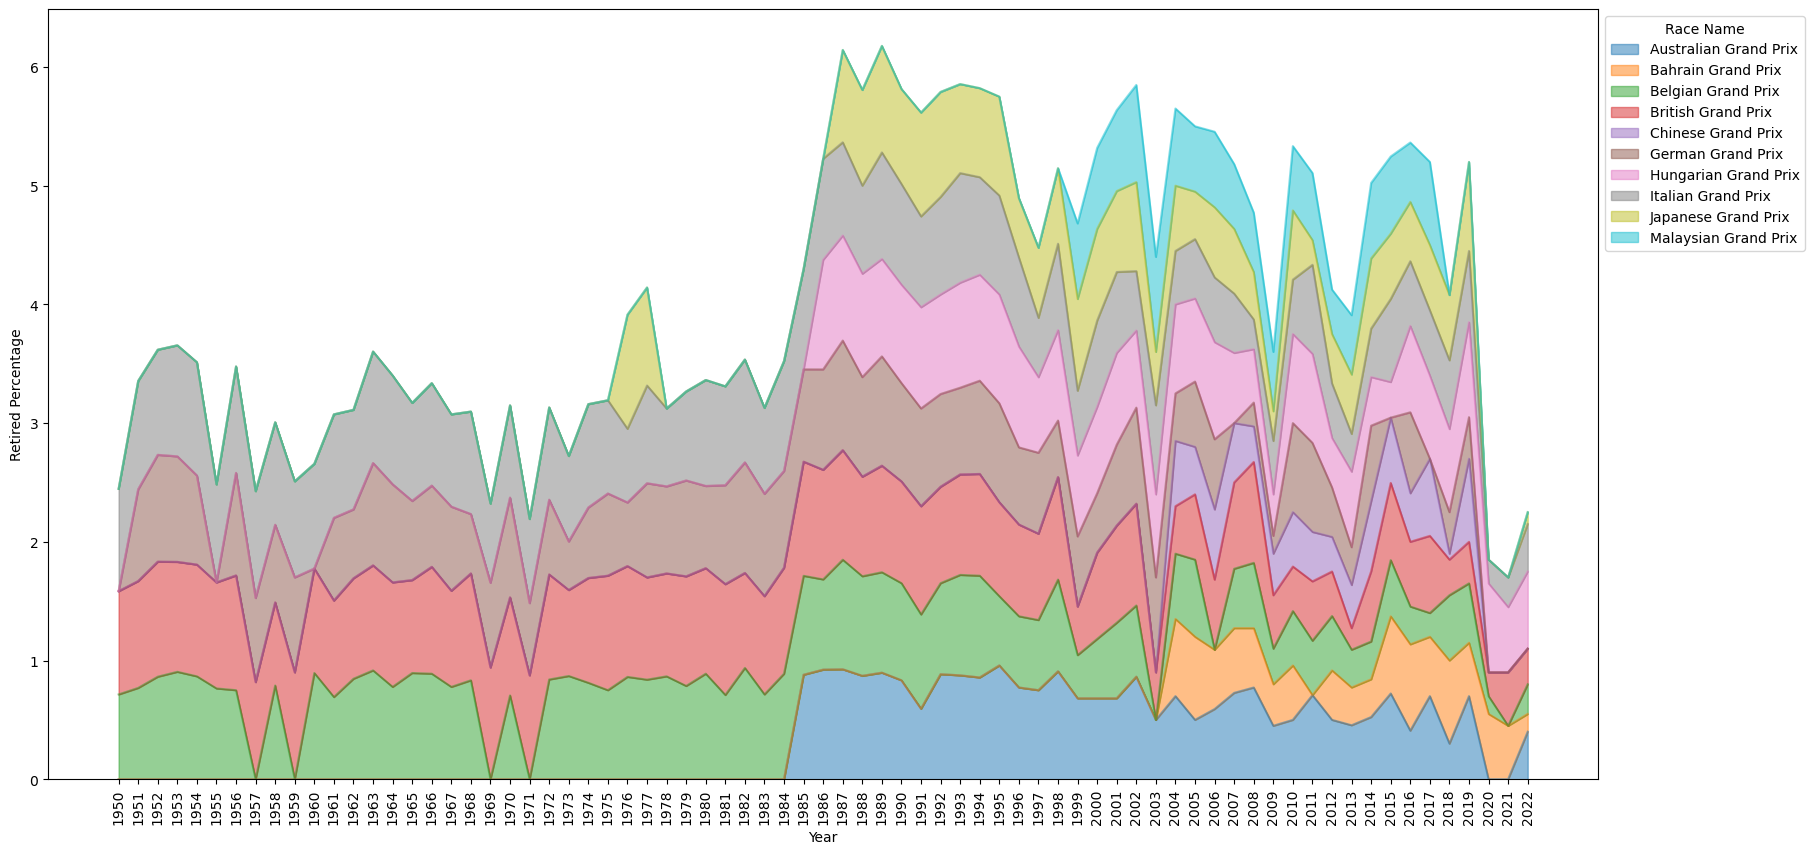

In [268]:
from collections import Counter
race_results = pd.merge(races, results, on='raceId')
# display(race_results)
race_results = race_results[['raceId', 'year', 'name', 'milliseconds','statusId']]
race_results = pd.merge(race_results, status, on='statusId')

not_completed = race_results.copy()
not_completed.replace('\\N', np.nan, inplace=True)
not_completed = not_completed[not_completed['milliseconds'].isna()]
not_completed["retired_bool"] = not_completed["statusId"].apply(lambda x: 0 if x == 1 else 1)

# get a list of all reasons for not completing the race
retire_reason = not_completed[not_completed['retired_bool'] == 1]
retire_reason = retire_reason.groupby(['raceId','year','name']).apply(lambda x: x['status'].to_list())
retire_reason = retire_reason.reset_index()
retire_reason.columns = ['raceId', 'year', 'name', 'reason']
retire_reason["frequency counts"] = retire_reason["reason"].apply(lambda x: dict(Counter(x)))

retired_drivers = not_completed.groupby(['raceId', 'year', 'name']).agg({'retired_bool': ['sum']})
retired_drivers.reset_index(['raceId', 'year', 'name']).reset_index(inplace=True)
completed = race_results[race_results['statusId'] == 1].groupby(['raceId', 'year', 'name']).agg({'statusId': ['sum']})
retired_drivers = pd.merge(retired_drivers, completed, on=['raceId', 'year', 'name'])
retired_drivers = pd.merge(retired_drivers, retire_reason, on=['raceId', 'year', 'name'])
retired_drivers.columns = ['raceId', 'year', 'name', 'retired', 'completed', 'reason', 'frequency_counts']
retired_drivers["retired_percentage"] = retired_drivers["retired"] / (retired_drivers["retired"] + retired_drivers["completed"])

# Define the race names you want to include in the chart
selected_races = ['German Grand Prix', 'Japanese Grand Prix', 'British Grand Prix', 'Hungarian Grand Prix', 'Belgian Grand Prix', 'Italian Grand Prix', 'Malaysian Grand Prix', 'Chinese Grand Prix', 'Australian Grand Prix', 'Bahrain Grand Prix']

# Filter the retired_drivers DataFrame to include only the selected races
filtered_retired_drivers = retired_drivers[retired_drivers['name'].isin(selected_races)]

# Restructure the data using groupby and unstack
grouped_data = filtered_retired_drivers.groupby(['year', 'name'])['retired_percentage'].sum().unstack()
grouped_data.fillna(0, inplace=True)

# Create the stacked area chart
plt.figure(figsize=(20, 10))
grouped_data.plot.area(stacked=True, figsize=(20, 10), alpha=0.5)

plt.xticks(grouped_data.index, rotation=90)
plt.ylabel('Retired Percentage')
plt.xlabel('Year')

# Show the legend
plt.legend(title='Race Name', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

/var/folders/xs/x2x4yg29089c8t_v4z9nymz40000gn/T/ipykernel_72453/2752275725.py:23: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  retired_drivers = pd.merge(retired_drivers, retire_reason, on=['raceId', 'year', 'name'])


,raceId,year,name,retired,completed,reason,frequency_counts,retired_percentage
0,1,2009,Australian Grand Prix,9,11,"[+1 Lap, Collision, Collision, Collision, Diff...","{'+1 Lap': 1, 'Collision': 3, 'Differential': ...",0.45
1,2,2009,Malaysian Grand Prix,10,10,"[+1 Lap, +1 Lap, +1 Lap, +1 Lap, +1 Lap, Spun ...","{'+1 Lap': 5, 'Spun off': 4, 'Engine': 1}",0.50
2,3,2009,Chinese Grand Prix,7,13,"[+1 Lap, +1 Lap, Collision, Spun off, +2 Laps,...","{'+1 Lap': 2, 'Collision': 1, 'Spun off': 1, '...",0.35
3,4,2009,Bahrain Grand Prix,7,13,"[+1 Lap, +1 Lap, +1 Lap, +1 Lap, +1 Lap, +1 La...","{'+1 Lap': 6, 'Oil pressure': 1}",0.35
4,5,2009,Spanish Grand Prix,12,8,"[+1 Lap, +1 Lap, +1 Lap, +1 Lap, +1 Lap, +1 La...","{'+1 Lap': 6, 'Collision': 4, 'Hydraulics': 1,...",0.60
...,...,...,...,...,...,...,...,...
1073,1092,2022,Japanese Grand Prix,2,18,"[Accident, Hydraulics]","{'Accident': 1, 'Hydraulics': 1}",0.10
1074,1093,2022,United States Grand Prix,3,17,"[Collision, Spun off, Collision damage]","{'Collision': 1, 'Spun off': 1, 'Collision dam...",0.15
1075,1094,2022,Mexico City Grand Prix,14,6,"[+1 Lap, +1 Lap, +1 Lap, +1 Lap, +1 Lap, +1 La...","{'+1 Lap': 11, 'Engine': 1, '+2 Laps': 1, 'Col...",0.70
1076,1095,2022,Brazilian Grand Prix,4,16,"[+1 Lap, Collision, Collision, Gearbox]","{'+1 Lap': 1, 'Collision': 2, 'Gearbox': 1}",0.20


[Text(1950, 0, '1950'),
 Text(1951, 0, '1951'),
 Text(1952, 0, '1952'),
 Text(1953, 0, '1953'),
 Text(1954, 0, '1954'),
 Text(1955, 0, '1955'),
 Text(1956, 0, '1956'),
 Text(1957, 0, '1957'),
 Text(1958, 0, '1958'),
 Text(1959, 0, '1959'),
 Text(1960, 0, '1960'),
 Text(1961, 0, '1961'),
 Text(1962, 0, '1962'),
 Text(1963, 0, '1963'),
 Text(1964, 0, '1964'),
 Text(1965, 0, '1965'),
 Text(1966, 0, '1966'),
 Text(1967, 0, '1967'),
 Text(1968, 0, '1968'),
 Text(1969, 0, '1969'),
 Text(1970, 0, '1970'),
 Text(1971, 0, '1971'),
 Text(1972, 0, '1972'),
 Text(1973, 0, '1973'),
 Text(1974, 0, '1974'),
 Text(1975, 0, '1975'),
 Text(1976, 0, '1976'),
 Text(1977, 0, '1977'),
 Text(1978, 0, '1978'),
 Text(1979, 0, '1979'),
 Text(1980, 0, '1980'),
 Text(1981, 0, '1981'),
 Text(1982, 0, '1982'),
 Text(1983, 0, '1983'),
 Text(1984, 0, '1984'),
 Text(1985, 0, '1985'),
 Text(1986, 0, '1986'),
 Text(1987, 0, '1987'),
 Text(1988, 0, '1988'),
 Text(1989, 0, '1989'),
 Text(1990, 0, '1990'),
 Text(1991, 0, '

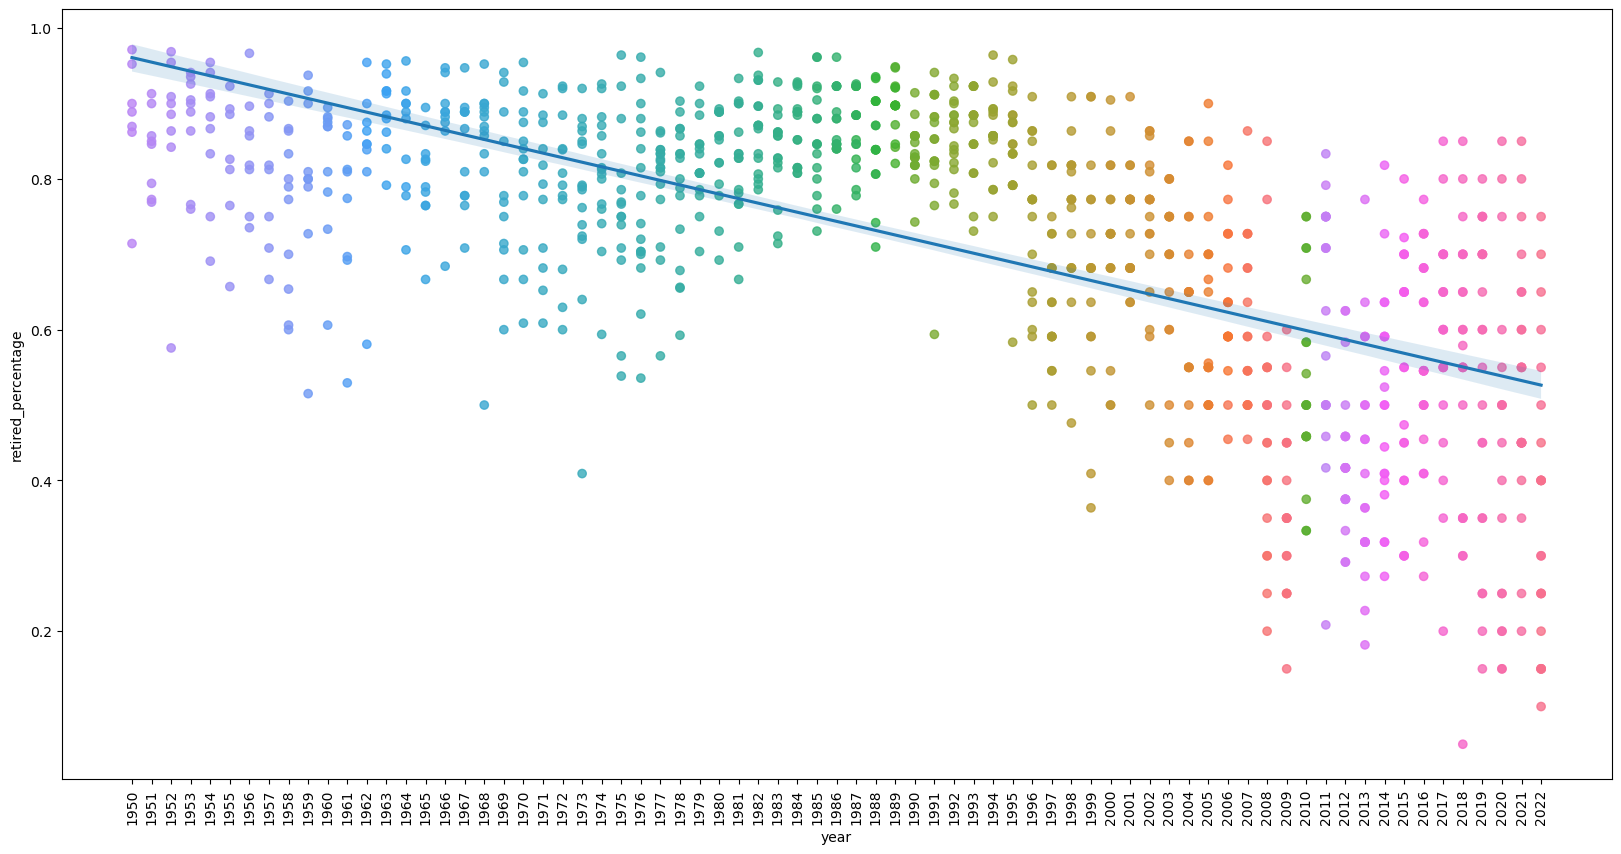

In [193]:
from collections import Counter
race_results = pd.merge(races, results, on='raceId')
# display(race_results)
race_results = race_results[['raceId', 'year', 'name', 'milliseconds','statusId']]
race_results = pd.merge(race_results, status, on='statusId')

not_completed = race_results.copy()
not_completed.replace('\\N', np.nan, inplace=True)
not_completed = not_completed[not_completed['milliseconds'].isna()]
not_completed["retired_bool"] = not_completed["statusId"].apply(lambda x: 0 if x == 1 else 1)

# get a list of all reasons for not completing the race
retire_reason = not_completed[not_completed['retired_bool'] == 1]
retire_reason = retire_reason.groupby(['raceId','year','name']).apply(lambda x: x['status'].to_list())
retire_reason = retire_reason.reset_index()
retire_reason.columns = ['raceId', 'year', 'name', 'reason']
retire_reason["frequency counts"] = retire_reason["reason"].apply(lambda x: dict(Counter(x)))

retired_drivers = not_completed.groupby(['raceId', 'year', 'name']).agg({'retired_bool': ['sum']})
retired_drivers.reset_index(['raceId', 'year', 'name']).reset_index(inplace=True)
completed = race_results[race_results['statusId'] == 1].groupby(['raceId', 'year', 'name']).agg({'statusId': ['sum']})
retired_drivers = pd.merge(retired_drivers, completed, on=['raceId', 'year', 'name'])
retired_drivers = pd.merge(retired_drivers, retire_reason, on=['raceId', 'year', 'name'])
retired_drivers.columns = ['raceId', 'year', 'name', 'retired', 'completed', 'reason', 'frequency_counts']
retired_drivers["retired_percentage"] = retired_drivers["retired"] / (retired_drivers["retired"] + retired_drivers["completed"])
retired_drivers.to_csv('retire_reason.csv', index=False)

date_range = np.sort(retired_drivers['year'].unique())
colour_map = sns.color_palette("husl", len(retired_drivers['raceId'].unique()))

plt.figure(figsize=(20,10))
ax = sns.regplot(data=retired_drivers, x='year', y='retired_percentage', scatter_kws={'color':colour_map})
ax.set_xticks(date_range)
ax.set_xticklabels(date_range, rotation=90)


{'retired': 2, 'completed': 18}


Text(0.5, 1.0, 'Reason for not completing race')

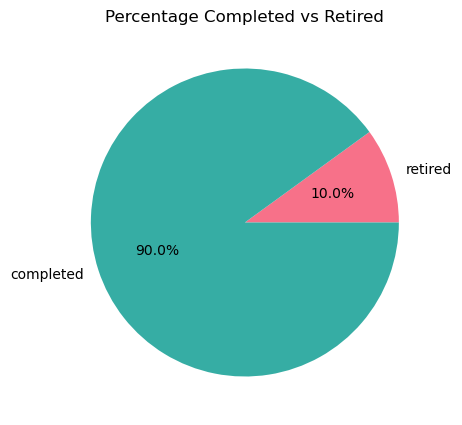

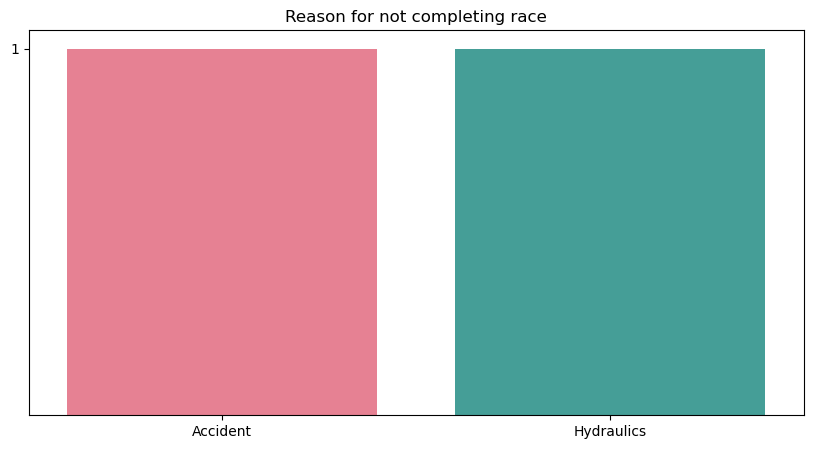

In [15]:
def get_frequency_dict(df):
    data_dict = df.iloc[0]['frequency counts']
    return data_dict

def get_drivers_count(df):
    data_dict = dict()
    data_dict['retired'] = df.iloc[0]['retired']
    data_dict['completed'] = df.iloc[0]['completed']
    return data_dict

race_1 = retired_drivers[retired_drivers['raceId'] == 1092]
data_dict = get_frequency_dict(race_1)

participating_drivers = get_drivers_count(race_1)
print(participating_drivers)
plt.figure(figsize=(10,5))
colours = sns.color_palette("husl", len(participating_drivers.values()))
pie_chart = plt.pie(x=participating_drivers.values(), labels=participating_drivers.keys(), autopct='%1.1f%%', colors=colours)
plt.title("Percentage Completed vs Retired")

plt.figure(figsize=(10,5))
ax = sns.barplot()
sns.barplot(x=list(data_dict.keys()), y=list(data_dict.values()), ax=ax, palette='husl')
max_tick = max(data_dict.values())
ax.set_yticks(range(1,max_tick+1))
ax.set_title("Reason for not completing race")

In [82]:
import requests

url = "https://api.openweathermap.org/data/3.0/onecall/timemachine"

headers = {'Content-Type': 'application/json'}

def parse_query_params(lat, lon, dt):
    query_params = {
        "lat": lat,
        "lon": lon,
        "dt": dt,
        "appid": "63bd1bb9d1a92d8eb0bfc71ec577bc67",
        "units": "metric"
    }
    return query_params

def convert_datetime_to_unix(dt):
    return int(dt.timestamp())

race_data = pd.merge(races, results, on='raceId')
race_data = pd.merge(race_data, circuits, on='circuitId')
race_data.columns
race_data = race_data[['raceId', 'year', 'country', 'circuitId', 'name_x', 'name_y', 'lat', 'lng','date', 'time_x', 'milliseconds']]
race_data = race_data[(~(race_data['date'] >= '2023-03-05') & ~(race_data['date'] <= '2005-01-01'))] #no start time available
race_data.columns = ['raceId', 'year', 'country', 'circuitId', 'grandprix', 'circuit', 'lat', 'lng','date', 'time', 'milliseconds']
race_data.replace('\\N', np.nan, inplace=True)
race_data.dropna(inplace=True)
race_data['datetime'] = race_data.apply(lambda x: x['date'] + ' ' + x['time'], axis=1)
race_data['datetime'] = pd.to_datetime(race_data['datetime'], format='%Y-%m-%d %H:%M:%S')

#group by raceId and select the fastest millisecond time
race_data_min = race_data.groupby(['raceId']).agg({'milliseconds': ['min']})
race_data_min.reset_index(inplace=True)
race_data_min.columns = ['raceId','milliseconds']
race_data = pd.merge(race_data_min,race_data, how='left', left_on=['raceId','milliseconds'], right_on=['raceId','milliseconds'])
race_data = race_data[['raceId', 'year', 'country', 'circuitId', 'grandprix', 'circuit', 'lat', 'lng', 'milliseconds', 'datetime', 'date']]
display(race_data)

,raceId,year,country,circuitId,grandprix,circuit,lat,lng,milliseconds,datetime,date
0,1,2009,Australia,1,Australian Grand Prix,Albert Park Grand Prix Circuit,-37.84970,144.96800,5655784,2009-03-29 06:00:00,2009-03-29
1,2,2009,Malaysia,2,Malaysian Grand Prix,Sepang International Circuit,2.76083,101.73800,4252092,2009-04-05 09:00:00,2009-04-05
2,3,2009,China,17,Chinese Grand Prix,Shanghai International Circuit,31.33890,121.22000,7063485,2009-04-19 07:00:00,2009-04-19
3,4,2009,Bahrain,3,Bahrain Grand Prix,Bahrain International Circuit,26.03250,50.51060,5508182,2009-04-26 12:00:00,2009-04-26
4,5,2009,Spain,4,Spanish Grand Prix,Circuit de Barcelona-Catalunya,41.57000,2.26111,5839202,2009-05-10 12:00:00,2009-05-10
...,...,...,...,...,...,...,...,...,...,...,...
343,1092,2022,Japan,22,Japanese Grand Prix,Suzuka Circuit,34.84310,136.54100,10904004,2022-10-09 05:00:00,2022-10-09
344,1093,2022,USA,69,United States Grand Prix,Circuit of the Americas,30.13280,-97.64110,6131687,2022-10-23 19:00:00,2022-10-23
345,1094,2022,Mexico,32,Mexico City Grand Prix,Autódromo Hermanos Rodríguez,19.40420,-99.09070,5916729,2022-10-30 20:00:00,2022-10-30
346,1095,2022,Brazil,18,Brazilian Grand Prix,Autódromo José Carlos Pace,-23.70360,-46.69970,5914044,2022-11-13 18:00:00,2022-11-13


In [83]:
race_data['temp'] = np.nan
race_data['clouds'] = np.nan
race_data['wind_speed'] = np.nan
race_data['wind_deg'] = np.nan
race_data['weather_before'] = np.nan
race_data['weather_main'] = np.nan
race_data['weather_desc'] = np.nan
race_data['precipitation'] = np.nan
race_data['weather_during'] = np.nan

In [194]:
# def call_weather_api(df):
#     for i in range(len(df['circuit'])):
#         dt_start = df.iloc[i]['datetime']
#         dt_start_unix = convert_datetime_to_unix(dt_start)
#         lat = df.iloc[i]['lat']
#         long = df.iloc[i]['lng']
#         response = requests.get(url, headers=headers, params=parse_query_params(lat, long, dt_start_unix))
#         response_json = response.json()
#         # print(response_json)
#         df.at[i, 'temp'] = response_json['data'][0]['temp']
#         df.at[i, 'clouds'] = response_json['data'][0]['clouds']
#         df.at[i, "wind_speed"] = response_json['data'][0]['wind_speed']
#         df.at[i, "wind_deg"] = response_json['data'][0]['wind_deg']
#         df.at[i, 'weather_main'] = response_json['data'][0]['weather'][0]['main']
#         df.at[i, 'weather_desc'] = response_json['data'][0]['weather'][0]['description']
#         print(response_json)
#         try:
#             df.at[i, 'precipitation'] = response_json['data'][0]['rain']['1h']
#         except(KeyError):
#             print("No rain")
        
#         dt_before = df.iloc[i]['datetime'] - pd.Timedelta(minutes=60)
#         dt_before_unix = convert_datetime_to_unix(dt_before)
#         response_before = requests.get(url, headers=headers, params=parse_query_params(lat, long, dt_before_unix))
#         response_before_json = response_before.json()
#         # print(response_before_json)
#         df.at[i, 'weather_before'] = response_before_json['data'][0]['weather'][0]['main']
#         dt_during = df.iloc[i]['datetime'] + pd.Timedelta(milliseconds=int(df.iloc[i]['milliseconds'])/2)
#         dt_during_unix = convert_datetime_to_unix(dt_during)
#         response_during = requests.get(url, headers=headers, params=parse_query_params(lat, long, dt_during_unix))
#         response_during_json = response_during.json()
#         df.at[i, 'weather_during'] = response_during_json['data'][0]['weather'][0]['main']
#     return df
# data_test = call_weather_api(race_data)

In [19]:
# display(data_test)
# data_test.to_csv('weather_data_new.csv', index=False)

In [147]:
races2 = pd.read_csv("races2.csv")
races2["Laps"] = races2["Laps"].astype(int)
races2["Scheduled Laps"] = races2["Scheduled Laps"].astype(int)
races2 = races2.sort_values(by='raceId')

race_weather_data_1 = pd.read_csv('weather_data.csv')
#join races2 and race_weather_data_1
race_weather_data = pd.merge(races2, race_weather_data_1, how='left', left_on='raceId', right_on='raceId')
race_data_sub = race_data[["raceId", "circuit"]]
weather_alt = pd.read_csv('weather_data_alt.csv')
weather_alt = weather_alt[['raceId','weather_before', 'precipitation', 'weather_during']]
race_data_alt = race_data[['raceId', 'country', 'grandprix']]
race_weather_data = pd.merge(race_weather_data,weather_alt, how='left', left_on='raceId', right_on='raceId')
race_weather_data = pd.merge(race_weather_data, race_data_alt, how='left', left_on='raceId', right_on='raceId')
race_weather_data = pd.merge(race_weather_data, race_data_sub, how='left', left_on='raceId', right_on='raceId')

#rename column 'year_x' to 'year'
race_weather_data.rename(columns={'year_x': 'year'}, inplace=True)
race_weather_data.rename(columns={'circuit_y': 'circuit'}, inplace=True)

race_weather_data = race_weather_data[['raceId', 'year', 'country', 'circuitId', 'grandprix', 'circuit', 'lat', 'lng', 'milliseconds', 
                                       'datetime', 'date', 'url', 'temp', 'clouds', 
                                       'wind_speed', 'wind_deg', 'weather_before', 'weather_main', 'weather_desc', 
                                       'precipitation', 'weather_during', "Scheduled Laps", "Laps"]]

#drop rows where circuit is 70th Anniversary Grand Prix
race_weather_data = race_weather_data[race_weather_data['grandprix'] != '70th Anniversary Grand Prix']
replace_dict = {'Korea': 'South Korea', 'UK': 'England','UAE': 'United Arab Emirates'}
race_weather_data['country'] = race_weather_data['country'].replace(replace_dict)
race_weather_data.to_csv('weather_data_alt.csv', index=False)

,raceId,year,grandprix,circuit,lat,lng,milliseconds,datetime,Scheduled Laps,Laps,...,clouds,wind_speed,wind_deg,weather_before,weather_main,weather_desc,precipitation,weather_during,Scheduled Laps.1,Laps.1
71,72,2005,Malaysian Grand Prix,Sepang International Circuit,2.76083,101.738,5493736,2005-03-20 15:00:00,56,56,...,75.0,0.50,80.0,Clouds,Haze,haze,NaN,Clouds,56,56
53,54,2006,Malaysian Grand Prix,Sepang International Circuit,2.76083,101.738,5440529,2006-03-19 15:00:00,56,56,...,75.0,1.50,100.0,Clouds,Haze,haze,NaN,Clouds,56,56
36,37,2007,Malaysian Grand Prix,Sepang International Circuit,2.76083,101.738,5534930,2007-04-08 07:00:00,56,56,...,75.0,2.60,200.0,Clouds,Clouds,broken clouds,NaN,Clouds,56,56
18,19,2008,Malaysian Grand Prix,Sepang International Circuit,2.76083,101.738,5478555,2008-03-23 07:00:00,56,56,...,75.0,1.50,260.0,Clouds,Clouds,broken clouds,NaN,Clouds,56,56
1,2,2009,Malaysian Grand Prix,Sepang International Circuit,2.76083,101.738,4252092,2009-04-05 09:00:00,56,31,...,75.0,1.00,290.0,Rain,Rain,light rain,0.86,Rain,56,31
91,339,2010,Malaysian Grand Prix,Sepang International Circuit,2.76083,101.738,5628412,2010-04-04 08:00:00,56,56,...,75.0,5.10,120.0,Clouds,Clouds,broken clouds,NaN,Clouds,56,56
109,842,2011,Malaysian Grand Prix,Sepang International Circuit,2.76083,101.738,5859832,2011-04-10 08:00:00,56,56,...,75.0,1.00,220.0,Clouds,Rain,light rain,0.45,Haze,56,56
128,861,2012,Malaysian Grand Prix,Sepang International Circuit,2.76083,101.738,9891812,2012-03-25 08:00:00,56,56,...,75.0,7.20,40.0,Clouds,Thunderstorm,thunderstorm,NaN,Rain,56,56
148,881,2013,Malaysian Grand Prix,Sepang International Circuit,2.76083,101.738,5936681,2013-03-24 08:00:00,56,56,...,75.0,5.14,50.0,Clouds,Thunderstorm,thunderstorm,NaN,Clouds,56,56
167,901,2014,Malaysian Grand Prix,Sepang International Circuit,2.76083,101.738,6025974,2014-03-30 08:00:00,56,56,...,75.0,4.63,190.0,Clouds,Clouds,broken clouds,NaN,Thunderstorm,56,56


(4152092.0, 9991812.0)

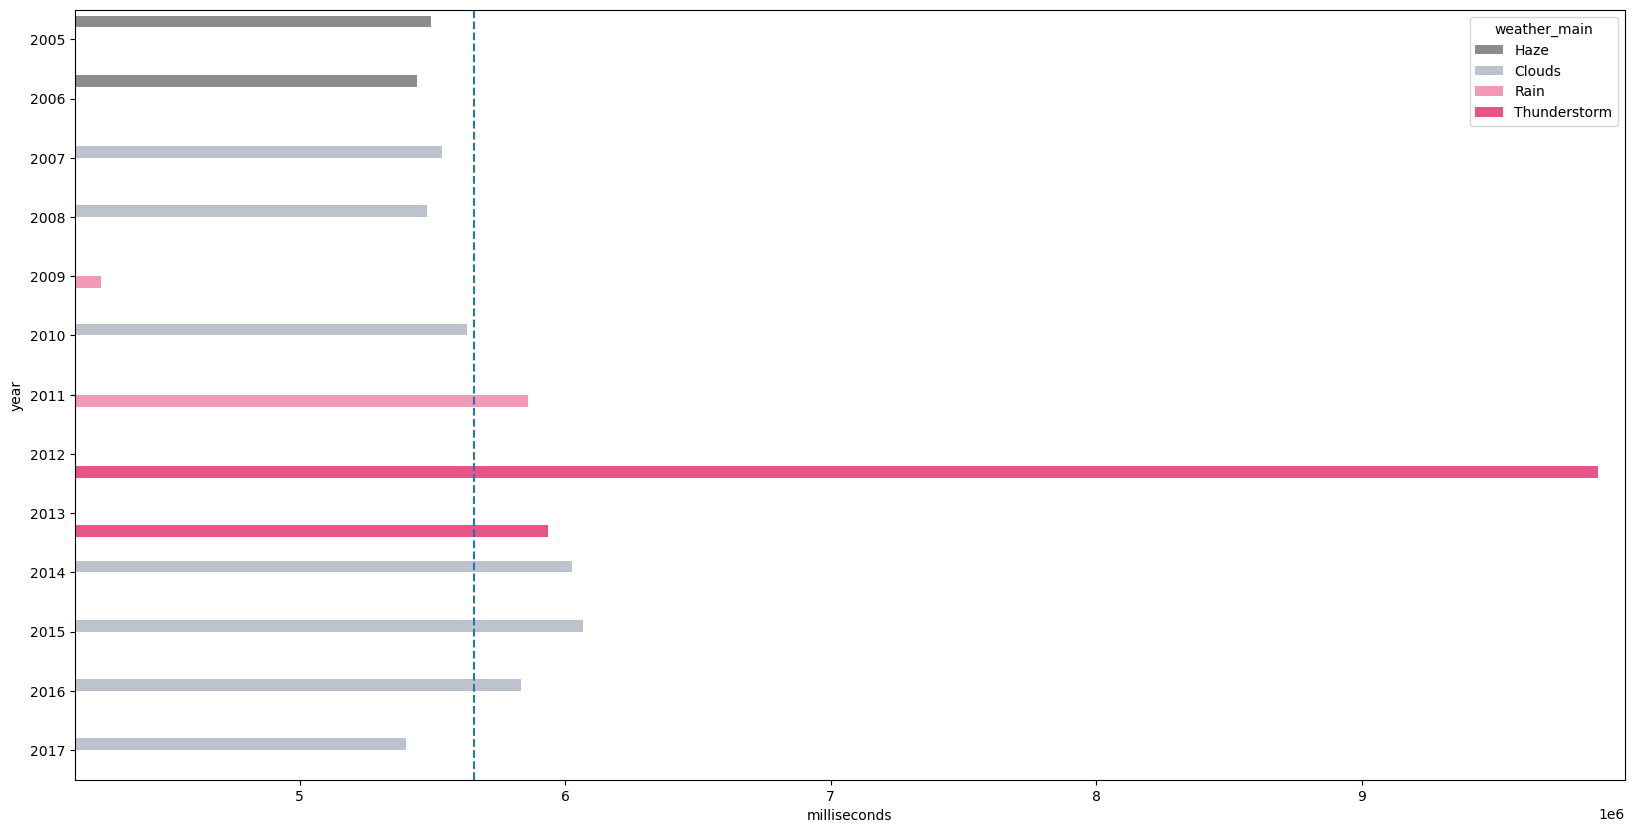

In [44]:
import math

race_weather_data = pd.read_csv('weather_data_alt.csv')
selected_gp = race_weather_data[race_weather_data['grandprix'] == 'Malaysian Grand Prix'].sort_values(by='year')
not_raining = selected_gp[selected_gp['weather_main'].isin(['Clear', 'Clouds', 'Haze', 'Mist', 'Fog'])]
avg_not_raining = not_raining['milliseconds'].mean()
display(selected_gp)

plt.figure(figsize=(20,10))
weather_conditions = ['Clear', 'Clouds', 'Rain', 'Thunderstorm', 'Haze', 'Mist', 'Fog', 'Drizzle']
palette = {"Clear": "#c0d6fa", "Clouds": "#bac2cf", "Rain": "#ff8cb4", "Thunderstorm": "#ff3d81", "Haze": "#8c8c8c", "Mist": "#8bafc4", "Fog": "#a6f7de", "Drizzle": "#ffa1d3"}
ax_bar = sns.barplot(data=selected_gp, x='milliseconds', y='year', hue='weather_main', orient='h', palette=palette)
plt.yticks(ha='right')
ax_bar.axvline(avg_not_raining, ls='--')
min_lim = math.floor(selected_gp['milliseconds'].min())
max_lim = math.ceil(selected_gp['milliseconds'].max())
ax_bar.set_xlim(min_lim-100000, max_lim+100000)

<Axes: ylabel='count'>

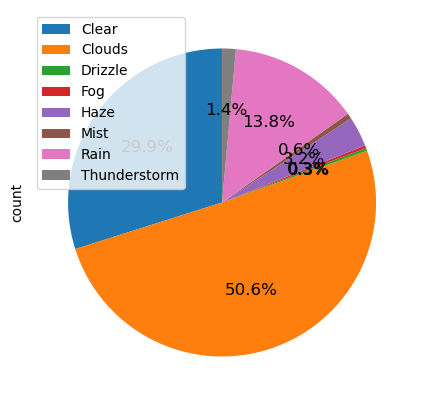

In [23]:
total_weather_conditions = race_weather_data.groupby(['weather_main']).agg({'weather_main': ['count']})
total_weather_conditions.reset_index(inplace=True)
total_weather_conditions.columns = ['weather_main', 'count']
total_weather_conditions.set_index('weather_main', inplace=True)


total_weather_conditions.plot.pie(y="count", figsize=(5, 5), autopct='%1.1f%%', startangle=90, legend=True, fontsize=12, labels=None)

In [136]:
%history

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importing the data
circuits = pd.read_csv('data/Formula1/circuits.csv')
constructor_results = pd.read_csv('data/Formula1/constructor_results.csv')
constructor_standings = pd.read_csv('data/Formula1/constructor_standings.csv')
constructors = pd.read_csv('data/Formula1/constructors.csv')
driver_standings = pd.read_csv('data/Formula1/driver_standings.csv')
drivers = pd.read_csv('data/Formula1/drivers.csv')
lap_times = pd.read_csv('data/Formula1/lap_times.csv')
pit_stops = pd.read_csv('data/Formula1/pit_stops.csv')
qualifying = pd.read_csv('data/Formula1/qualifying.csv')
races = pd.read_csv('data/Formula1/races.csv')
results = pd.read_csv('data/Formula1/results.csv')
seasons = pd.read_csv('data/Formula1/seasons.csv')
sprint_results = pd.read_csv('data/Formula1/sprint_results.csv')
status = pd.read_csv('data/Formula1/status.csv')
constructors_data = pd.merge(constructors, constructor_standings, on

In [149]:
results_sub = results[['raceId', 'driverId', 'position']]
races_years = races[['raceId', 'year']]
results_sub = pd.merge(results_sub,races_years, how='left', left_on='raceId', right_on='raceId')
lap_times_sub = lap_times[['raceId', 'driverId', 'milliseconds', "time", "lap"]]
lap_times_sub = pd.merge(lap_times_sub,results_sub, how='left', left_on=['raceId', 'driverId'], right_on=['raceId', 'driverId'])
drivers_sub = drivers[['driverId', 'forename', 'surname']]
lap_times_sub = pd.merge(lap_times_sub,drivers_sub, how='left', left_on='driverId', right_on='driverId')
lap_times_sub = lap_times_sub[lap_times_sub['position'] == "1"]
lap_times_sub = lap_times_sub[(~(lap_times_sub['year'] >= 2023) & ~(lap_times_sub['year'] <= 2004))]

#merge forename and surname columns into single column
lap_times_sub['driver'] = lap_times_sub['forename'] + ' ' + lap_times_sub['surname']
#drop forename and surname columns
lap_times_sub = lap_times_sub.drop(['forename', 'surname', "position"], axis=1)
lap_times_sub.to_csv('laptime_data.csv', index=False)


In [180]:
laptime = lap_times.copy()
#check datatypes
laptime.dtypes

laptime_sub = laptime[laptime['driverId'] == 1]
laptime_sub = laptime_sub[laptime_sub['raceId'] == 1045]
laptime_sub
sum_laptime = laptime_sub['milliseconds'].sum()
sum_laptime
# laptime_sub.shape

7187515

In [191]:
test_data = pd.read_csv('weather_data_alt.csv')
test_data = test_data[test_data['circuitId'] == 2]
mean = test_data['milliseconds'].mean()